<a href="https://colab.research.google.com/github/vanimalhotra22/vaniai/blob/main/hackathon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Install XGBoost if not already
!pip install xgboost --quiet

import pandas as pd
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
train = pd.read_csv("/content/Train_Data (1).csv")
test = pd.read_csv("/content/Test_Data (1).csv")

# Separate features and target
X = train.drop(columns=["SEQN", "age_group"])
y = train["age_group"]
X_test = test.drop(columns=["SEQN"])

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Map target labels (Adult → 0, Senior → 1)
y = y.map({'Adult': 0, 'Senior': 1})

# Drop any rows where mapping failed
valid_rows = y.notna()
X_imputed = X_imputed[valid_rows]
y = y[valid_rows].astype(int)

# Optional: Split to validate
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train XGBoost model
# Train on full imputed + cleaned data
model = XGBClassifier(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.01,
    subsample=0.9,
    colsample_bytree=0.8,
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
    random_state=42
)

model.fit(X_imputed, y)  # use full dataset now



# Predict on validation set (optional)
val_preds = model.predict(X_valid)
print("Validation accuracy:", accuracy_score(y_valid, val_preds))

# Predict on test set
test_preds = model.predict(X_test_imputed)

# Save submission
submission = pd.DataFrame({
    "id": test.index + 1,
    "age_group": test_preds.astype(int)
})
submission.to_csv("submission.csv", index=False)

# Check prediction distribution
print("✅ submission.csv created successfully.")
print(submission["age_group"].value_counts())
print(submission.head())


Validation accuracy: 0.9974424552429667
✅ submission.csv created successfully.
age_group
0    274
1     38
Name: count, dtype: int64
   id  age_group
0   1          0
1   2          1
2   3          0
3   4          0
4   5          0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

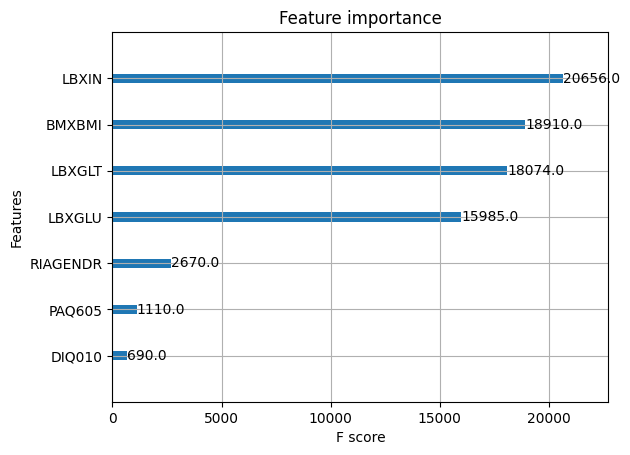

In [43]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20)


In [44]:
import joblib
joblib.dump(model, "final_xgb_model.pkl")


['final_xgb_model.pkl']